In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import thefuzz 
from thefuzz import process


# DAta Cleaning

In [2]:
df = pd.read_csv(r"C:\Users\szeya\Downloads\netflix_titles_2021.csv\netflix_titles_2021.csv")
df2 =df.copy()
df.sample(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5320,s5321,TV Show,Dinotrux,NaN,"Andrew Francis, Richard Ian Cox, Ashleigh Ball...",United States,"August 18, 2017",2017,TV-Y7,5 Seasons,Kids' TV,"Half dinosaur, half construction truck, full-o..."
4705,s4706,Movie,The Guernsey Literary and Potato Peel Pie Society,Mike Newell,"Lily James, Michiel Huisman, Penelope Wilton, ...","United Kingdom, France, United States","August 10, 2018",2018,TV-PG,124 min,"Dramas, Romantic Movies",A London writer bonds with the colorful reside...
3510,s3511,TV Show,When the Camellia Blooms,NaN,"Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...",South Korea,"September 18, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Dongbaek is a single mother. When a potential ...
4192,s4193,Movie,Revenger,Lee Seung-won,"Bruce Khan, Park Hee-soon, Yoon Jin-seo, Kim I...",South Korea,"January 15, 2019",2018,TV-MA,102 min,"Action & Adventure, International Movies",Hell-bent on avenging the murder of his family...
4342,s4343,Movie,Line Walker,Jazz Boon,"Nick Cheung, Louis Koo, Francis Chun-Yu Ng, Ch...","China, Hong Kong","December 1, 2018",2016,TV-MA,109 min,"Action & Adventure, Dramas, International Movies",A Hong Kong intelligence officer tasked with f...
8165,s8166,TV Show,Teresa,NaN,"Angelique Boyer, Sebastián Rulli, Aarón Díaz, ...",Mexico,"December 31, 2017",2010,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, Spa...","We all want so much more than we have, but how..."
7950,s7951,Movie,Saving Zoë,Jeffrey G. Hunt,"Laura Marano, Vanessa Marano, Christopher Tava...",United States,"January 15, 2020",2019,R,95 min,Dramas,A reserved high school freshman acts out when ...
3937,s3938,TV Show,Imposters,NaN,"Inbar Lavi, Rob Heaps, Parker Young, Marianne ...",United States,"April 5, 2019",2017,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Com...","Supported by a team of fellow thieves, a con a..."
3726,s3727,TV Show,The Casketeers,NaN,NaN,New Zealand,"June 21, 2019",2019,TV-14,2 Seasons,"International TV Shows, Reality TV",Māori funeral directors Francis and Kaiora Tip...
4607,s4608,Movie,Theeya Velai Seyyanum Kumaru,Sundar C.,"Siddarth, Santhanam, Hansika Motwani, Ganesh V...",India,"October 1, 2018",2013,TV-PG,132 min,"Comedies, International Movies, Music & Musicals",When shy Kumar gets stuck on the losing end of...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
pd.DataFrame(df.isna().sum()/df.shape[0])

,0
show_id,0.000000
type,0.000000
title,0.000000
director,0.299080
cast,0.093675
country,0.094357
date_added,0.001135
release_year,0.000000
rating,0.000454
duration,0.000341


In [5]:
df.duplicated().sum()

0

In [6]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4024,s4025,Movie,Triple Frontier,J.C. Chandor,"Ben Affleck, Oscar Isaac, Charlie Hunnam, Pedr...",United States,"March 13, 2019",2019,R,126 min,Action & Adventure,Loyalties are tested when five former special ...


In [7]:
df.title.value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

In [8]:
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


<Axes: xlabel='type', ylabel='count'>

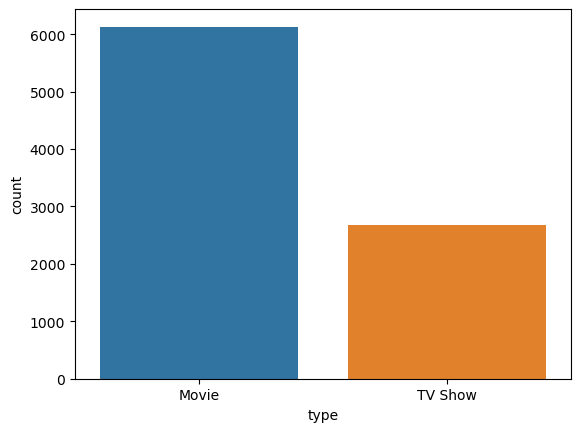

In [9]:
sns.countplot(data=df ,x ="type")

<Axes: >

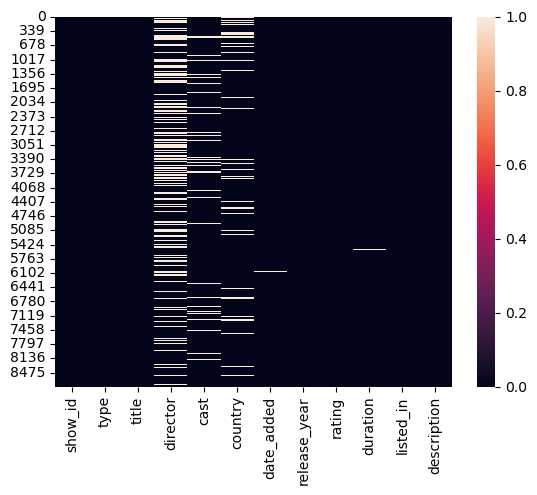

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.dropna(subset=["director" ,"cast"] , inplace=True)

In [12]:
df.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         364
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [13]:
dic_map ={"country" : 0 , 
         "rating" : df.rating.mode()[0] ,
        "duration" :df.duration.mode()[0] }
df.fillna(dic_map , inplace=True)

In [14]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8214,s8215,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,"October 10, 2015",2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...


In [16]:
df.drop(columns=["show_id"] ,axis=1 , inplace=True)


In [17]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",0,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",0,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [18]:
df.date_added =pd.to_datetime(df.date_added ,infer_datetime_format=True ,errors ="coerce" )

In [19]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",0,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",0,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [20]:
df["year_of_creat"] =df.date_added.dt.year

In [21]:
df.drop("date_added" ,axis =1 , inplace=True)

In [22]:
df

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_of_creat
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",0,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",0,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


# #Most watched shows on the Netflix?

In [23]:
pd.DataFrame(df.type.value_counts())

,type
Movie,5522
TV Show,178


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


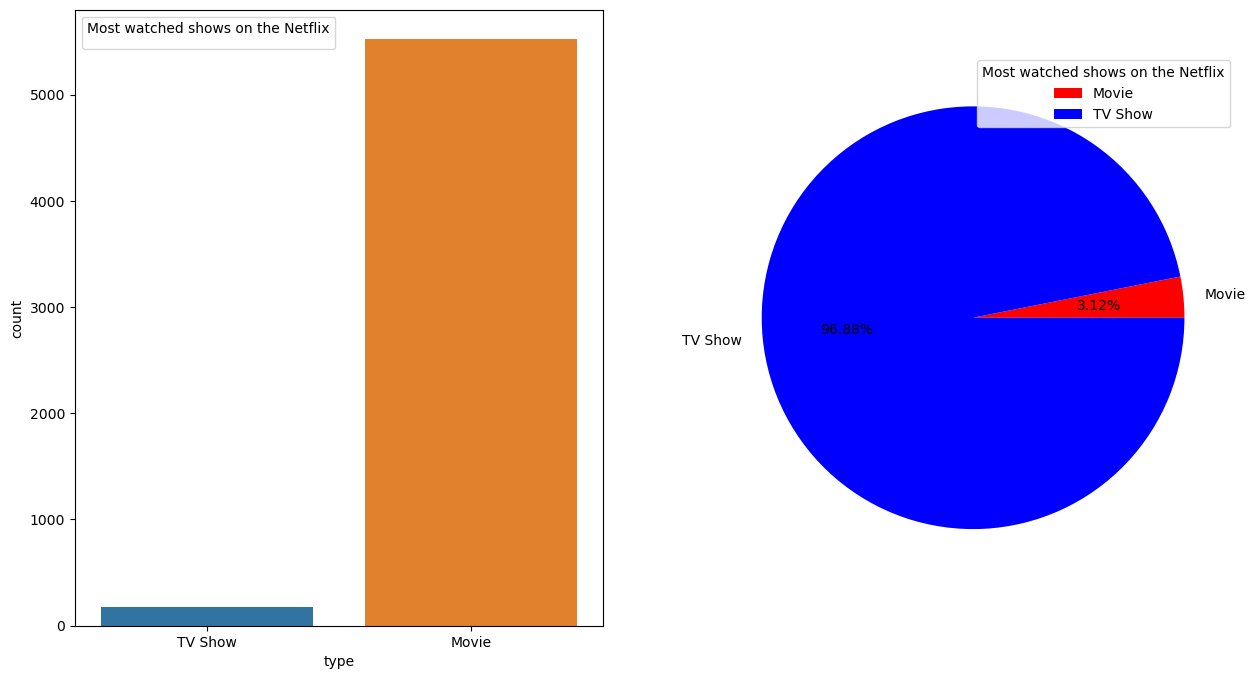

In [24]:
plt.figure(figsize=(15 ,8 ))
plt.subplot(1,2,1)
sns.countplot(x= df.type,orient='v')
plt.legend(title='Most watched shows on the Netflix')
plt.subplot(1,2,2)
plt.pie(df.type.value_counts().sort_values() ,autopct="%1.2f%%" ,labels=df.type.value_counts().keys() ,colors=['r' ,"b"] )
plt.legend(title='Most watched shows on the Netflix')

In [25]:
df.rating.value_counts()

TV-MA       1940
TV-14       1329
R            789
PG-13        477
TV-PG        456
PG           279
TV-Y7        123
TV-Y         102
TV-G          96
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'TV-14'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'R'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'TV-Y7'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR')])

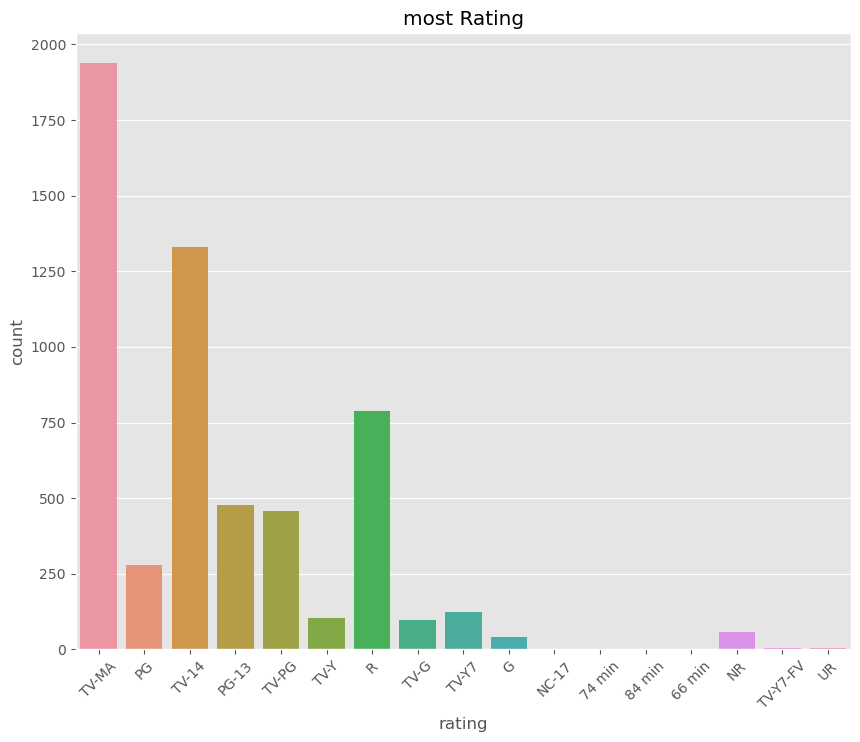

In [26]:
plt.style.use("ggplot")
plt.figure(figsize=(10,8))
sns.countplot(x=df.rating)
plt.title("most Rating")
plt.xticks(rotation =45)

In [27]:
data =['74 min','66 min','84 min']



In [33]:
df.sample()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_of_creat
5430,Movie,Marco Luque: Tamo Junto,Caio Cobra,Marco Luque,Brazil,2017,TV-MA,73 min,Stand-Up Comedy,Eclectic character comedian Marco Luque plays ...,2017.0


In [34]:
df= df[~df.rating.isin(data)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'TV-14'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'R'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'TV-Y7'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, 'NR'),
  Text(12, 0, 'TV-Y7-FV'),
  Text(13, 0, 'UR')])

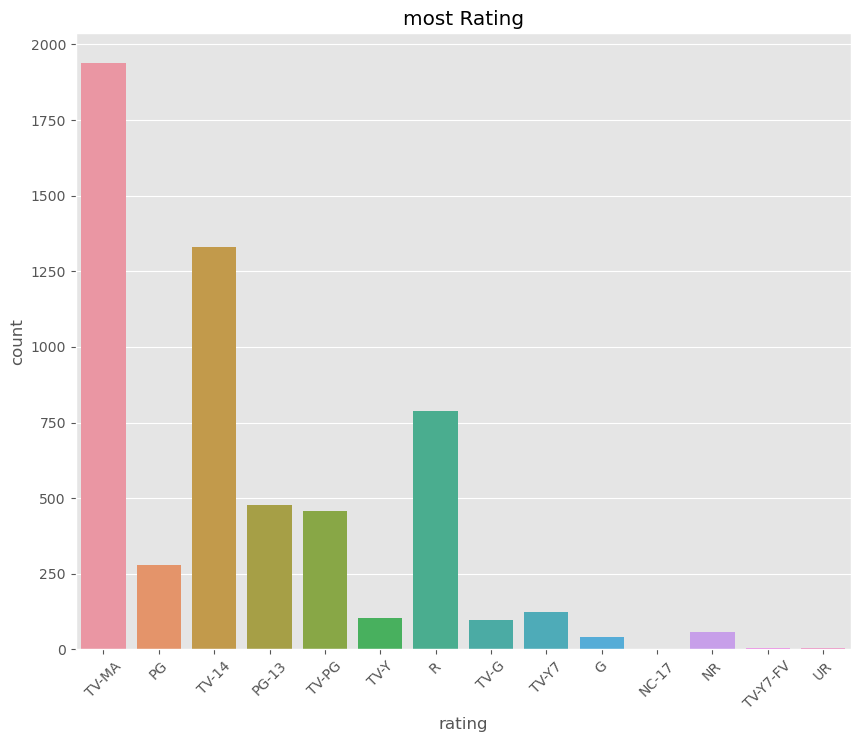

In [40]:
plt.style.use("ggplot")
plt.figure(figsize=(10,8))
sns.countplot(x=df.rating)
plt.title("most Rating")
plt.xticks(rotation =45)

# Which has the highest rating Tv show or Movies?

In [46]:
pd.crosstab(df.rating , df.type)

type,Movie,TV Show
rating,,
G,40,0
NC-17,2,0
NR,58,0
PG,279,0
PG-13,477,0
R,788,1
TV-14,1279,50
TV-G,93,3
TV-MA,1843,97


<Axes: xlabel='rating', ylabel='count'>

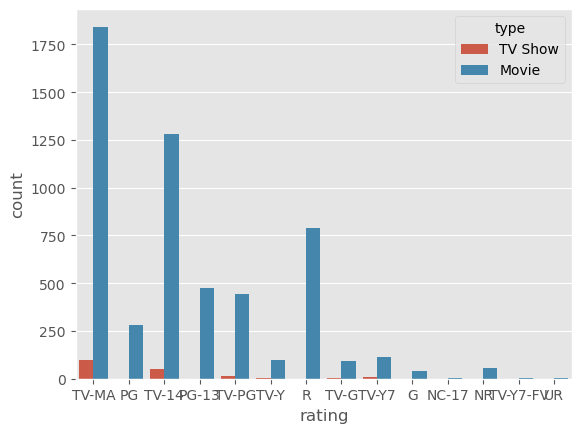

In [50]:
sns.countplot(data=df , x= "rating" , hue="type")

In [51]:
df.sample()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_of_creat
1816,Movie,Tremors: Shrieker Island,Don Michael Paul,"Michael Gross, Jon Heder, Caroline Langrishe, ...",United States,2020,PG-13,102 min,"Action & Adventure, Horror Movies",When massive mutant creatures infiltrate an is...,2020.0


In [52]:
df.listed_in.unique()

array(['Crime TV Shows, International TV Shows, TV Action & Adventure',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies', 'Thrillers',
       'Comedies, International Movies',
       'Comedies, International Movies, Romantic Movies',
       'Comedies, International Movies, Music & Musicals', 'Comedies',
       'Horror Movies, Sci-Fi & Fantasy',
       'Dramas, International Movies, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Action & Adventure, Dramas',
       'Action & Adventure, Classic Movies, Dramas',
       'Dramas, Horror Movies, Thrillers',
       'Action & Adventure, Horror Movies, Thrillers',
       'Action & Adventure',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Dramas, Thrillers',
       'A

['eslam', 'sabry']